In [3]:
import datetime
import json
from math import fabs
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from scipy.optimize import minimize
import seaborn as sns

In [5]:
from abrechnung import spielwert

In [94]:
spieler = ["Andi", "Balthasar", "Michi", "Moritz", "Olaf", "MP", "Philipp"]
spieler = ["Balthasar", "Michi", "Moritz", "MP", "Olaf", "Philipp", "Sonja"]
match0 = {"startzeit": 0}
for sp in spieler:
    match0[sp] = 0
niceColumns = ["Ansager", "spieltyp", "farbe"] + spieler + ["spieldauer"]

In [9]:
matches = [match0]
p = Path("/home/balthasar/sk/matches/")
for f in os.listdir(p):
    print(f)
    with open(p/f) as f:
        res = json.load(f)
        sw = spielwert(**res)
        sw.update(res)
        if sw["startzeit"] is None:
            sw["startzeit"] = sw["endzeit"]
        matches.append(sw)

1579605870_Sauspiel.json
1579104126_Sauspiel.json
1579087166_Sauspiel.json
1578666218_Sauspiel.json
1579269514_Solo.json
1579268763_Sauspiel.json
1579518783_Sauspiel.json
1579014832_Sauspiel.json
1579174423_Sauspiel.json
1579014279_Sauspiel.json
1579173551_Sauspiel.json
1578920475_Sauspiel.json
1579259297_Sauspiel.json
1578396731_Sauspiel.json
1578929426_Solo.json
1579259076_Sauspiel.json
1579604519_Sauspiel.json
1578654131_Sauspiel.json
1578482592_Sauspiel.json
1579519227_Ramsch.json
1579518561_Sauspiel.json
1578395167_Sauspiel.json
1578655454_Sauspiel.json
1579519692_Sauspiel.json
1578931142_Sauspiel.json
1578395462_Sauspiel.json
1578667912_Sauspiel.json
1579175359_Sauspiel.json
1579681851_Wenz.json
1579534356_Sauspiel.json
1579621134_Sauspiel.json
1579518332_Sauspiel.json
1579270579_Ramsch.json
1578928668_Sauspiel.json
1579532535_Sauspiel.json
1578930844_Sauspiel.json
1579606093_Sauspiel.json
1579260231_Solo.json
1579271125_Ramsch.json
1579175597_Sauspiel.json
1578929823_Sauspiel.js

In [11]:
df_raw = pd.DataFrame(sorted(matches, key=lambda x: x["startzeit"]))
#df["start"] = df.startzeit.apply(datetime.datetime.fromtimestamp)
df_raw.tail(20)

startzeit  Balthasar  Michi  Moritz     MP   Olaf  Philipp  Sonja  \
129  1579605083        NaN -180.0  -180.0  540.0 -180.0      NaN    NaN   
130  1579605357       20.0    NaN    20.0  -20.0  -20.0      NaN    NaN   
131  1579605611       60.0  -60.0    60.0    NaN  -60.0      NaN    NaN   
132  1579605870      -20.0  -20.0    20.0   20.0    NaN      NaN    NaN   
133  1579606093       20.0   20.0     NaN  -20.0  -20.0      NaN    NaN   
134  1579606341        NaN   30.0   -30.0   30.0  -30.0      NaN    NaN   
135  1579606739     -200.0    NaN   200.0  200.0 -200.0      NaN    NaN   
136  1579620329       40.0  -40.0     NaN   40.0    NaN      NaN  -40.0   
137  1579620519     -100.0  300.0     NaN -100.0    NaN      NaN -100.0   
138  1579620877      -30.0   30.0     NaN   30.0    NaN      NaN  -30.0   
139  1579621134      -60.0   60.0     NaN   60.0    NaN      NaN  -60.0   
140  1579680165       40.0  -40.0     NaN    NaN  -40.0     40.0    NaN   
141  1579680495       20.0  -20.0     NaN    NaN   20.0    -20.0    NaN   
142  1579680781      140.0 -140.0     NaN    NaN  140.0   -140.0    NaN   
143  1579681053        0.0   20.0     NaN    NaN    0.0    -20.0    NaN   
144  1579681121      -70.0   70.0     NaN    NaN  -70.0     70.0    NaN   
145  1579681620      -60.0   60.0     NaN    NaN   60.0    -60.0    NaN   
146  1579681851      140.0  140.0     NaN    NaN -420.0    140.0    NaN   
147  1579682483      240.0  -80.0     NaN    NaN  -80.0    -80.0    NaN   
148  1579682759      -40.0   40.0     NaN    NaN   40.0    -40.0    NaN   

      spieler0   spieler1  ... jungfrau3 vergeben verspielt    farbe  \
129      Michi         MP  ...     False    False       NaN   Eichel   
130         MP       Olaf  ...     False    False       NaN  Schelln   
131       Olaf     Moritz  ...     False    False       NaN   Eichel   
132     Moritz  Balthasar  ...     False    False       NaN     Gras   
133  Balthasar      Michi  ...     False    False       NaN  Schelln   
134      Michi         MP  ...     False    False       NaN  Schelln   
135         MP       Olaf  ...     False    False       NaN  Schelln   
136         MP      Sonja  ...     False    False       NaN     Gras   
137      Sonja  Balthasar  ...     False    False       NaN    keine   
138  Balthasar      Michi  ...     False    False       NaN     Gras   
139      Michi         MP  ...     False    False       NaN   Eichel   
140       Olaf      Michi  ...     False    False       NaN     Gras   
141      Michi    Philipp  ...     False    False       NaN     Gras   
142    Philipp  Balthasar  ...     False    False       NaN     Gras   
143  Balthasar       Olaf  ...     False     True       NaN    keine   
144  Balthasar       Olaf  ...     False    False       NaN  Schelln   
145       Olaf      Michi  ...     False    False       NaN  Schelln   
146      Michi    Philipp  ...     False    False       NaN    keine   
147    Philipp  Balthasar  ...     False    False       NaN    keine   
148  Balthasar       Olaf  ...     False    False       NaN     Gras   

          endzeit            kommentar manual_res0 manual_res1  manual_res2  \
129  1.579605e+09                              NaN         NaN          NaN   
130  1.579606e+09                              NaN         NaN          NaN   
131  1.579606e+09        olaf böhmisch         NaN         NaN          NaN   
132  1.579606e+09                              NaN         NaN          NaN   
133  1.579606e+09                              NaN         NaN          NaN   
134  1.579607e+09                              NaN         NaN          NaN   
135  1.579607e+09               ohne 3         NaN         NaN          NaN   
136  1.579620e+09                              NaN         NaN          NaN   
137  1.579621e+09  michi verspielt >60         NaN         NaN          NaN   
138  1.579621e+09                              NaN         NaN          NaN   
139  1.579621e+09                              N

In [13]:
list(df_raw.columns)


['startzeit',
 'Balthasar',
 'Michi',
 'Moritz',
 'MP',
 'Olaf',
 'Philipp',
 'Sonja',
 'spieler0',
 'spieler1',
 'spieler2',
 'spieler3',
 'geber',
 'spieltyp',
 'leger0',
 'leger1',
 'leger2',
 'leger3',
 'spieler',
 'mitspieler',
 'kontra0',
 'kontra1',
 'kontra2',
 'kontra3',
 'tout',
 'sie',
 'schneider',
 'laufende',
 'gewonnen',
 'durchmarsch_gewinner',
 'verlierer',
 'jungfrau0',
 'jungfrau1',
 'jungfrau2',
 'jungfrau3',
 'vergeben',
 'verspielt',
 'farbe',
 'endzeit',
 'kommentar',
 'manual_res0',
 'manual_res1',
 'manual_res2',
 'manual_res3']

In [15]:
df = df_raw.filter(spieler, axis=1)
df.fillna(0, inplace=True)
df["check"] = df.sum(axis=1, numeric_only=True)
df_cumsum = df.cumsum()

In [17]:
df.tail(30)

Balthasar  Michi  Moritz     MP   Olaf  Philipp  Sonja  check
119       80.0  -80.0    80.0    0.0  -80.0      0.0    0.0    0.0
120      -20.0   20.0    20.0    0.0  -20.0      0.0    0.0    0.0
121     -180.0  180.0   180.0    0.0 -180.0      0.0    0.0    0.0
122       40.0  -40.0   -40.0    0.0   40.0      0.0    0.0    0.0
123      -40.0  -40.0    40.0    0.0   40.0      0.0    0.0    0.0
124       30.0  -30.0   -30.0    0.0   30.0      0.0    0.0    0.0
125       40.0 -120.0    40.0    0.0   40.0      0.0    0.0    0.0
126     -480.0  160.0   160.0    0.0  160.0      0.0    0.0    0.0
127      -20.0   20.0    20.0  -20.0    0.0      0.0    0.0    0.0
128       40.0   40.0     0.0  -40.0  -40.0      0.0    0.0    0.0
129        0.0 -180.0  -180.0  540.0 -180.0      0.0    0.0    0.0
130       20.0    0.0    20.0  -20.0  -20.0      0.0    0.0    0.0
131       60.0  -60.0    60.0    0.0  -60.0      0.0    0.0    0.0
132      -20.0  -20.0    20.0   20.0    0.0      0.0    0.0    0.0
133       20.0   20.0     0.0  -20.0  -20.0      0.0    0.0    0.0
134        0.0   30.0   -30.0   30.0  -30.0      0.0    0.0    0.0
135     -200.0    0.0   200.0  200.0 -200.0      0.0    0.0    0.0
136       40.0  -40.0     0.0   40.0    0.0      0.0  -40.0    0.0
137     -100.0  300.0     0.0 -100.0    0.0      0.0 -100.0    0.0
138      -30.0   30.0     0.0   30.0    0.0      0.0  -30.0    0.0
139      -60.0   60.0     0.0   60.0    0.0      0.0  -60.0    0.0
140       40.0  -40.0     0.0    0.0  -40.0     40.0    0.0    0.0
141       20.0  -20.0     0.0    0.0   20.0    -20.0    0.0    0.0
142      140.0 -140.0     0.0    0.0  140.0   -140.0    0.0    0.0
143        0.0   20.0     0.0    0.0    0.0    -20.0    0.0    0.0
144      -70.0   70.0     0.0    0.0  -70.0     70.0    0.0    0.0
145      -60.0   60.0     0.0    0.0   60.0    -60.0    0.0    0.0
146      140.0  140.0     0.0    0.0 -420.0    140.0    0.0    0.0
147      240.0  -80.0     0.0    0.0  -80.0    -80.0    0.0    0.0
148      -40.0   40.0     0.0    0.0   40.0    -40.0    0.0    0.0

In [19]:
df_cumsum.tail(30)

Balthasar   Michi  Moritz     MP    Olaf  Philipp  Sonja  check
119     1140.0   680.0  1060.0   50.0 -1140.0  -1790.0    0.0    0.0
120     1120.0   700.0  1080.0   50.0 -1160.0  -1790.0    0.0    0.0
121      940.0   880.0  1260.0   50.0 -1340.0  -1790.0    0.0    0.0
122      980.0   840.0  1220.0   50.0 -1300.0  -1790.0    0.0    0.0
123      940.0   800.0  1260.0   50.0 -1260.0  -1790.0    0.0    0.0
124      970.0   770.0  1230.0   50.0 -1230.0  -1790.0    0.0    0.0
125     1010.0   650.0  1270.0   50.0 -1190.0  -1790.0    0.0    0.0
126      530.0   810.0  1430.0   50.0 -1030.0  -1790.0    0.0    0.0
127      510.0   830.0  1450.0   30.0 -1030.0  -1790.0    0.0    0.0
128      550.0   870.0  1450.0  -10.0 -1070.0  -1790.0    0.0    0.0
129      550.0   690.0  1270.0  530.0 -1250.0  -1790.0    0.0    0.0
130      570.0   690.0  1290.0  510.0 -1270.0  -1790.0    0.0    0.0
131      630.0   630.0  1350.0  510.0 -1330.0  -1790.0    0.0    0.0
132      610.0   610.0  1370.0  530.0 -1330.0  -1790.0    0.0    0.0
133      630.0   630.0  1370.0  510.0 -1350.0  -1790.0    0.0    0.0
134      630.0   660.0  1340.0  540.0 -1380.0  -1790.0    0.0    0.0
135      430.0   660.0  1540.0  740.0 -1580.0  -1790.0    0.0    0.0
136      470.0   620.0  1540.0  780.0 -1580.0  -1790.0  -40.0    0.0
137      370.0   920.0  1540.0  680.0 -1580.0  -1790.0 -140.0    0.0
138      340.0   950.0  1540.0  710.0 -1580.0  -1790.0 -170.0    0.0
139      280.0  1010.0  1540.0  770.0 -1580.0  -1790.0 -230.0    0.0
140      320.0   970.0  1540.0  770.0 -1620.0  -1750.0 -230.0    0.0
141      340.0   950.0  1540.0  770.0 -1600.0  -1770.0 -230.0    0.0
142      480.0   810.0  1540.0  770.0 -1460.0  -1910.0 -230.0    0.0
143      480.0   830.0  1540.0  770.0 -1460.0  -1930.0 -230.0    0.0
144      410.0   900.0  1540.0  770.0 -1530.0  -1860.0 -230.0    0.0
145      350.0   960.0  1540.0  770.0 -1470.0  -1920.0 -230.0    0.0
146      490.0  1100.0  1540.0  770.0 -1890.0  -1780.0 -230.0    0.0
147      730.0  1020.0  1540.0  770.0 -1970.0  -1860.0 -230.0    0.0
148      690.0  1060.0  1540.0  770.0 -1930.0  -1900.0 -230.0    0.0

In [21]:
colorlist=['C0','C1','C2','C3','C4','C5','grey']
df_cumsum.drop("check", axis=1, inplace=True)

In [23]:
def perfDist(arr, dist=20):
    
    cons = []
    def cons_generator():
        for i in range(len(arr)):
            for j in range(len(arr)):
                if i <= j:
                    continue
                def f (x, i=i, j=j):
                    return fabs(x[i]-x[j])-dist
                yield f
    
    for l in cons_generator():
        cons.append({'type': 'ineq', 'fun': l})
    
    res = []
    def sumOfSquares(xs):
        sos = 0
        for x_old, x_new in zip(xs, arr):
            sos += (x_old-x_new)**2
        return sos
    
    start = arr+np.random.randn(len(arr))*0.2
    res = minimize(sumOfSquares, start, constraints=cons, method='trust-constr')
    return res.x, res.success, res

In [25]:
def plotter(df, t=None):
    if t == None:
        t=len(df)
    df.iloc[0:t].plot.line(figsize=(10,8),color=colorlist)
    plt.axhline(color='black', lw=1)
    plt.legend(loc=3)
    plt.xlabel('Runden')
    plt.xlim(left=0., right=len(df)-1)
    plt.ylabel('Money (€cents)')
    plt.tick_params(axis='y', right=True, direction='in')
    ymin,ymax=plt.gca().get_ylim()
    pos,success,res = perfDist(df_cumsum.iloc[t-1].values, dist=(fabs(ymin)+fabs(ymax))/42.)
    texts=[plt.text(len(df),p,name+' ({})'.format(df[name].iloc[t-1]), color=c, va='center') for (name, c, p) in zip(df.columns, colorlist, pos)]
    #plt.yscale("semilog")
    plt.tight_layout()
    return success, res

/home/balthasar/.venvs/jupyterlab/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


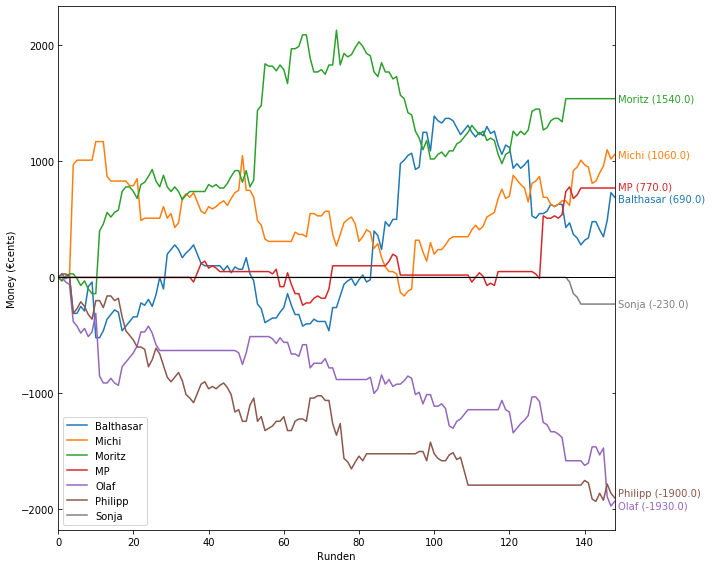

In [27]:
plotter(df_cumsum)
plt.savefig('aktueller_stand.png', dpi=300)

In [33]:
integ=np.trapz(df,x=df.index, axis=0)
df_integ=pd.DataFrame(integ, index=df.columns, columns=['Integrated'])
df_integ.sort_values('Integrated', ascending=False)

Integrated
Moritz         1540.0
Michi          1040.0
MP              770.0
Balthasar       710.0
check             0.0
Sonja          -230.0
Philipp       -1880.0
Olaf          -1950.0

In [35]:
def make_gif():
    for t in range(2, len(df_cumsum)+1):
        success,res=plotter(df_cumsum, t)
        plt.savefig('pngs/{:03d}'.format(t))
        plt.close()
        
    !convert -delay 20 -loop 0 pngs/* schafkopf_evolution_20.gif

In [37]:
#make_gif()

## Definiere bessere Variablen

In [39]:
df_results = df_raw[1:]

### Vergeben ist kein richtiges Spiel

In [41]:
df_results[df_results.vergeben]

startzeit  Balthasar  Michi  Moritz    MP  Olaf  Philipp  Sonja  \
70   1579088680        NaN    0.0    20.0 -20.0   0.0      0.0    NaN   
143  1579681053        0.0   20.0     NaN   NaN   0.0    -20.0    NaN   

      spieler0 spieler1  ... jungfrau3 vergeben verspielt  farbe  \
70     Philipp   Moritz  ...     False     True       NaN  keine   
143  Balthasar     Olaf  ...     False     True       NaN  keine   

          endzeit kommentar manual_res0 manual_res1  manual_res2  manual_res3  
70   1.579089e+09                   NaN         NaN          NaN          NaN  
143  1.579681e+09                   NaN         NaN          NaN          NaN  

[2 rows x 44 columns]

In [43]:
df_results = df_results[df_results.vergeben==False]

In [45]:
df_results.filter(["spieler", "spieltyp"])

spieler  spieltyp
1        0.0  Sauspiel
2        2.0  Sauspiel
3        3.0  Sauspiel
4        3.0      Solo
5        2.0  Sauspiel
..       ...       ...
144      3.0  Sauspiel
145      0.0  Sauspiel
146      3.0      Wenz
147      1.0      Wenz
148      1.0  Sauspiel

[146 rows x 2 columns]

In [47]:
df_results["Ansager"] = df_results[1:].apply(lambda x: getattr(x, "spieler{}".format(int(x.spieler)), "niemand"), axis=1)

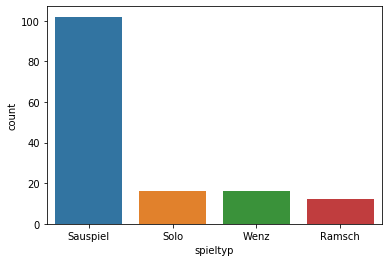

In [49]:
sns.countplot(x="spieltyp", data=df_results)

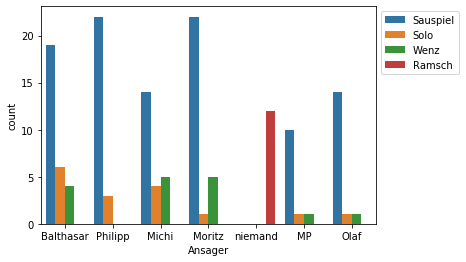

In [51]:
sns.countplot(x="Ansager", data=df_results, hue="spieltyp")
plt.legend(bbox_to_anchor=(1,1))

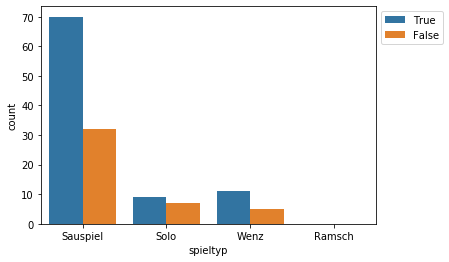

In [53]:
sns.countplot(x="spieltyp", data=df_results, hue="gewonnen")
plt.legend(bbox_to_anchor=(1,1))

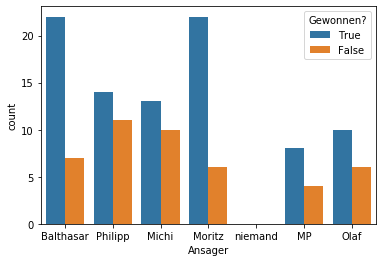

In [55]:
sns.countplot(x="Ansager", data=df_results, hue="gewonnen")# [df_results.spieltyp=="Wenz"]
plt.legend(bbox_to_anchor=(1,1), title="Gewonnen?")

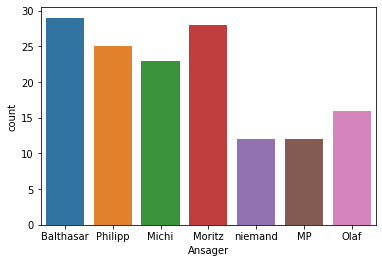

In [57]:
sns.countplot(x="Ansager", data=df_results)

In [59]:
n_spiele = {}
for sp in spieler:
    #print(sp)
    n_spiele[sp] = (df_results.spieler0==sp).sum()+(df_results.spieler1==sp).sum()+(df_results.spieler2==sp).sum()+(df_results.spieler3==sp).sum()
n_spiele

{'Balthasar': 128,
 'Michi': 112,
 'Moritz': 116,
 'MP': 44,
 'Olaf': 88,
 'Philipp': 92,
 'Sonja': 4}

In [61]:
n_ansagen = []
for sp in spieler:
    n_ansagen.append((df_results.Ansager == sp).sum()/n_spiele[sp])

Text(0, 0.5, 'Anteil gespielte Spiele angesagt')

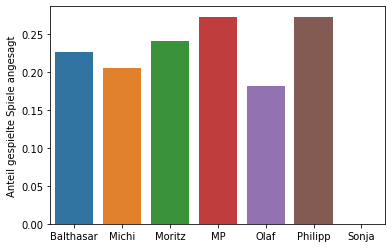

In [63]:
sns.barplot(x=spieler, y=n_ansagen)
plt.ylabel("Anteil gespielte Spiele angesagt")

In [92]:
def minutes(x):
    return "{:02d}:{:02d}".format(int(x//60), int(x%60))
#df_results["spieldauer"] = (df_results.endzeit-df_results.startzeit).apply(minutes)

In [96]:
df_results.filter(niceColumns).fillna("-").tail(10)

Ansager  spieltyp    farbe Balthasar Michi Moritz  MP Olaf Philipp  \
138      Michi  Sauspiel     Gras       -30    30      -  30    -       -   
139         MP  Sauspiel   Eichel       -60    60      -  60    -       -   
140       Olaf  Sauspiel     Gras        40   -40      -   -  -40      40   
141    Philipp  Sauspiel     Gras        20   -20      -   -   20     -20   
142  Balthasar  Sauspiel     Gras       140  -140      -   -  140    -140   
144    Philipp  Sauspiel  Schelln       -70    70      -   -  -70      70   
145       Olaf  Sauspiel  Schelln       -60    60      -   -   60     -60   
146       Olaf      Wenz    keine       140   140      -   - -420     140   
147  Balthasar      Wenz    keine       240   -80      -   -  -80     -80   
148       Olaf  Sauspiel     Gras       -40    40      -   -   40     -40   

    Sonja spieldauer  
138   -30      02:56  
139   -60      03:18  
140     -      04:06  
141     -      03:52  
142     -      02:41  
144     -      03:59  
145     -      02:56  
146     -      09:00  
147     -      03:28  
148     -      03:59

In [98]:
with open("spiele.html", "w") as f:
    f.write(df_results.filter(niceColumns).fillna("-").to_html())
with open("spiele.csv", "w") as f:
    f.write(df_results.filter(niceColumns).fillna("-").to_csv())

In [104]:

(df_results.endzeit-df_results.startzeit).sum()/3600

8.952777777777778

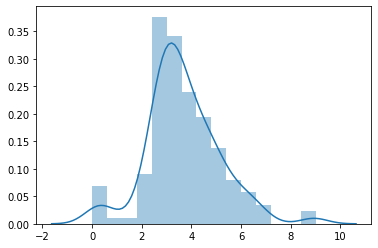

In [110]:
sns.distplot((df_results.endzeit-df_results.startzeit)/60)